<a href="https://colab.research.google.com/github/yperdana/predicting-used-car-price-based-on-kilometer/blob/master/predict_mercedes_benz_used_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

this project created to gain more exercise linear regression with real dataset. this project also part of Bangkit Academy. 

we try to learn and do modification. we try to predict something new such as corelation between median_house_value and median_income. 

Our team members: Yohanes, Eko, Yogic. 

source: https://colab.research.google.com/drive/1BLjEdyADzVC5nvkJ_yASffxyOmiOCJaM#scrollTo=YgyGafFJsQ25&line=4&uniqifier=1

Learning Objectives:
1. Play with Tensorflow
2. Import and Learn linear regression with real dataset.
3. find data corelation.
4. Make hypothesis
5. Learn to create model.
6. Experiment with dataset and features.
7. Tweaking hyperparameters.
8. Visualize the result.

In [0]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

# Import relevant libraries
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# SETTING UP PANDAS 
# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

Import and setting usually not hard but necessary and less error if we run in codelab. We use tensorflow version 2 for machine learning task. Numpy for math calculation, and pandas to store data in memory.

In [5]:
# Import the dataset.
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Scale the label.
training_df["median_house_value"] /= 1000.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5


Importing data set, scaling median_house_value and print some of data to check overal data.

In [6]:
# Get statistics on the dataset.
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0,17000.0
mean,-119.6,35.6,28.6,2643.7,539.4,1429.6,501.2,3.9,207.3
std,2.0,2.1,12.6,2179.9,421.5,1147.9,384.5,1.9,116.0
min,-124.3,32.5,1.0,2.0,1.0,3.0,1.0,0.5,15.0
25%,-121.8,33.9,18.0,1462.0,297.0,790.0,282.0,2.6,119.4
50%,-118.5,34.2,29.0,2127.0,434.0,1167.0,409.0,3.5,180.4
75%,-118.0,37.7,37.0,3151.2,648.2,1721.0,605.2,4.8,265.0
max,-114.3,42.0,52.0,37937.0,6445.0,35682.0,6082.0,15.0,500.0


In [8]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


In [14]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label, largest_value):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = largest_value
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


Our Hypothesis:
1. Median_house_value have corelation with median_income.
2. Population with total rooms
3. households with total_rooms


Train on 17000 samples
Epoch 1/50
17000/17000 [==============================] - 1s 50us/sample - loss: 19748.0488 - root_mean_squared_error: 140.5278
Epoch 2/50
17000/17000 [==============================] - 1s 35us/sample - loss: 16398.4481 - root_mean_squared_error: 128.0565
Epoch 3/50
17000/17000 [==============================] - 1s 35us/sample - loss: 13360.7179 - root_mean_squared_error: 115.5886
Epoch 4/50
17000/17000 [==============================] - 1s 38us/sample - loss: 10657.4583 - root_mean_squared_error: 103.2349
Epoch 5/50
17000/17000 [==============================] - 1s 37us/sample - loss: 8246.8917 - root_mean_squared_error: 90.8124
Epoch 6/50
17000/17000 [==============================] - 1s 38us/sample - loss: 6148.6658 - root_mean_squared_error: 78.4134
Epoch 7/50
17000/17000 [==============================] - 1s 36us/sample - loss: 4355.2454 - root_mean_squared_error: 65.9943
Epoch 8/50
17000/17000 [==============================] - 1s 35us/sample - loss: 2877.8

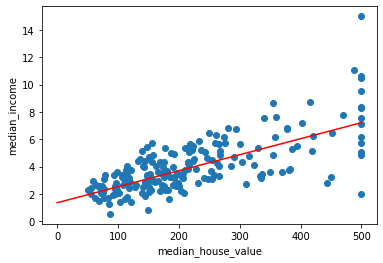

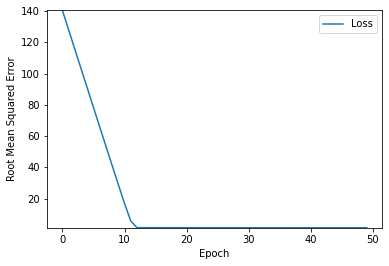

In [11]:
# Testing Corelation between median_house_value and median income.

# Selecting label and feature
my_feature = "median_house_value"
my_label="median_income" 

# Assign values to these three hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size =  30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label,500)
plot_the_loss_curve(epochs, rmse)

Train on 17000 samples
Epoch 1/50
17000/17000 [==============================] - 1s 49us/sample - loss: 967434.1402 - root_mean_squared_error: 983.5823
Epoch 2/50
17000/17000 [==============================] - 1s 40us/sample - loss: 809517.4606 - root_mean_squared_error: 899.7317
Epoch 3/50
17000/17000 [==============================] - 1s 38us/sample - loss: 663288.9691 - root_mean_squared_error: 814.4256
Epoch 4/50
17000/17000 [==============================] - 1s 40us/sample - loss: 531799.3675 - root_mean_squared_error: 729.2458
Epoch 5/50
17000/17000 [==============================] - 1s 36us/sample - loss: 418076.3704 - root_mean_squared_error: 646.5882
Epoch 6/50
17000/17000 [==============================] - 1s 36us/sample - loss: 319176.5203 - root_mean_squared_error: 564.9570
Epoch 7/50
17000/17000 [==============================] - 1s 37us/sample - loss: 233272.9874 - root_mean_squared_error: 482.9835
Epoch 8/50
17000/17000 [==============================] - 1s 39us/sample -

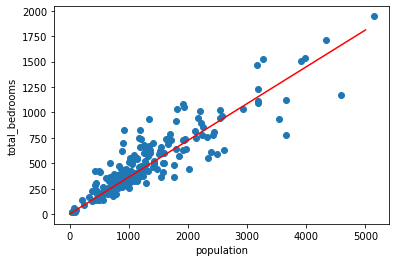

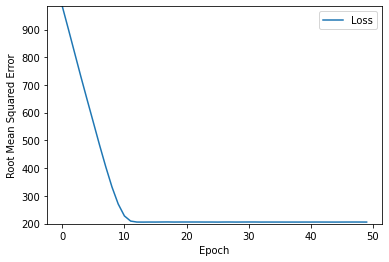

In [18]:
# Testing Corelation between Population and total rooms .

# Selecting label and feature
my_feature = "population"
my_label="total_bedrooms" 

# Assign values to these three hyperparameters.
learning_rate = 0.0001
epochs = 50
batch_size =  30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label,5000)
plot_the_loss_curve(epochs, rmse)

Train on 17000 samples
Epoch 1/50
17000/17000 [==============================] - 1s 50us/sample - loss: 1980144.1304 - root_mean_squared_error: 1407.1761
Epoch 2/50
17000/17000 [==============================] - 1s 36us/sample - loss: 738594.5829 - root_mean_squared_error: 859.4155
Epoch 3/50
17000/17000 [==============================] - 1s 37us/sample - loss: 740479.5146 - root_mean_squared_error: 860.5110
Epoch 4/50
17000/17000 [==============================] - 1s 36us/sample - loss: 738791.4233 - root_mean_squared_error: 859.5297
Epoch 5/50
17000/17000 [==============================] - 1s 36us/sample - loss: 740878.9440 - root_mean_squared_error: 860.7435
Epoch 6/50
17000/17000 [==============================] - 1s 40us/sample - loss: 740053.8806 - root_mean_squared_error: 860.2640
Epoch 7/50
17000/17000 [==============================] - 1s 37us/sample - loss: 739919.6824 - root_mean_squared_error: 860.1860
Epoch 8/50
17000/17000 [==============================] - 1s 39us/sample

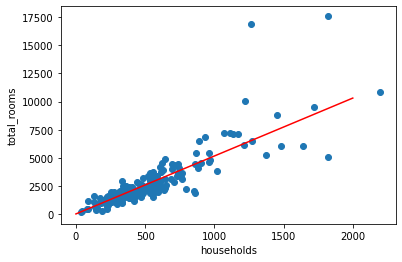

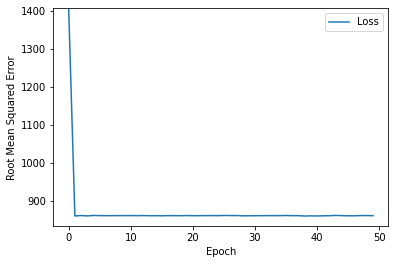

In [23]:
# Testing Corelation between households and total_rooms.

# Selecting label and feature
my_feature = "households"
my_label="total_rooms" 

# Assign values to these three hyperparameters.
learning_rate = 0.01
epochs = 50
batch_size =  30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label,2000)
plot_the_loss_curve(epochs, rmse)

Conclution:
1. Corelation Between Median_house_value and median_income is true.

2. Corelation between Population and total rooms is true

3. Corelation between households and total_rooms is true